<a href="https://colab.research.google.com/github/eriksali/DNN_2023_NLP/blob/main/a3_mnist_transform_gpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt

# Define the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the subset of classes to use
classes = [0, 1, 2, 3, 4]  # choose any 5 classes from 0 to 9

# Load the Fashion-MNIST dataset
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True,
                                               transform=torchvision.transforms.Compose([
                                                   torchvision.transforms.ToTensor(),
                                                   torchvision.transforms.Normalize((0.5,), (0.5,))
                                               ]))

# Define the model architecture
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 16, kernel_size=5, padding=2)
        self.conv2 = torch.nn.Conv2d(16, 32, kernel_size=5, padding=2)
        self.fc1 = torch.nn.Linear(32*7*7, 120)
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 5)

    def forward(self, x):
        x = torch.nn.functional.relu(self.conv1(x))
        x = torch.nn.functional.max_pool2d(x, 2)
        x = torch.nn.functional.relu(self.conv2(x))
        x = torch.nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 32*7*7)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load the trained model
model = CNN()
model.load_state_dict(torch.load('my_model.pt', map_location=device))
model.to(device)

# Extract the weights of the filters in both convolutional layers
conv1_weights = model.conv1.weight.detach().cpu().numpy()
conv2_weights = model.conv2.weight.detach().cpu().numpy()

# Visualize the weights as gray level images
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
for i, ax in enumerate(axs.flat):
    if i < 8:
        ax.imshow(conv1_weights[i, 0, :, :], cmap='gray')
    else:
        ax.imshow(conv2_weights[i-8, 0, :, :], cmap='gray')
    ax.axis('off')
plt.show()


FileNotFoundError: ignored

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Load the Fashion-MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)



  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
import torch.nn as nn

# Define a CNN model with two convolutional layers
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool1(nn.functional.relu(self.conv1(x)))
        x = self.pool2(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()


Epoch 1 loss: 0.450
Epoch 2 loss: 0.296
Epoch 3 loss: 0.253
Epoch 4 loss: 0.223
Epoch 5 loss: 0.201


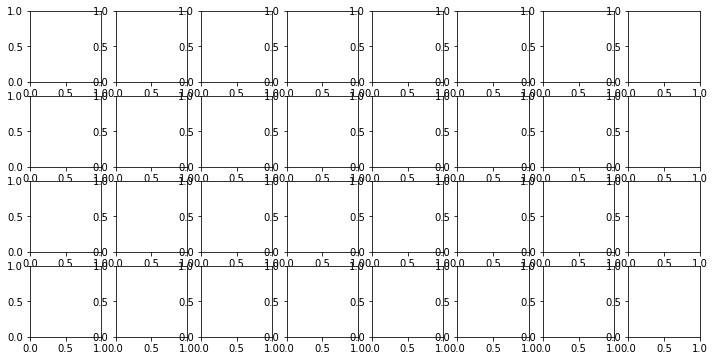

In [ ]:
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model on the Fashion-MNIST training data
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

# Extract the weights of the filters in both of the convolutional layers
conv1_weights = model.state_dict()['conv1.weight']
conv2_weights = model.state_dict()['conv2.weight']

import matplotlib.pyplot as plt

# Visualize the filter weights as gray-level images
fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))
for i in range(4):
    for j in range(8):
        axs



In [ ]:
dataset_full = torchvision.datasets.FashionMNIST(data_folder, train = True, download = True, transform = transforms.ToTensor())
# Selecting classes 7, 2, 5 and 6
idx = (dataset_full.targets==7) | (dataset_full.targets==2) | (dataset_full.targets==5) | (dataset_full.targets==6)
dataset_full.targets = dataset_full.targets[idx]
dataset_full.data = dataset_full.data[idx]

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Pullover Pullover Pullover Sandal
[1,  2000] loss: 0.750
[1,  4000] loss: 0.371
[1,  6000] loss: 0.274
[2,  2000] loss: 0.241
[2,  4000] loss: 0.216
[2,  6000] loss: 0.203
Finished Training
GroundTruth:  Ankle boot T-shirt T-shirt Dress
Predicted:  Ankle boot T-shirt T-shirt Dress
Accuracy of the network on the 10000 test iamges: 9 %
Accuracy of T-shirt :  0 %
Accuracy of Trouser :  0 %
Accuracy of Pullover : 83 %
Accuracy of Dress :  0 %
Accuracy of  Coat :  0 %
Accuracy of Sandal : 97 %
Accuracy of Shirt : 91 %
Accuracy of Sneaker : 98 %
Accuracy of   Bag :  0 %
Accuracy of Ankle boot :  0 %


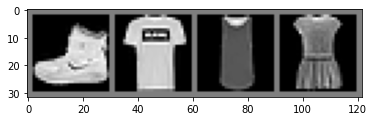

In [ ]:
# import torchvision module to handle image manipulation
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
#import torchvision.transform as transforms

# import standard PyTorch modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter # TensorBoard support

import matplotlib.pyplot as plt
import numpy as np


import matplotlib.pyplot as plt
import numpy as np



'''transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)'''


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))]
)

'''# Use standard FashionMNIST dataset
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)'''


##train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_set = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Selecting classes 7, 2, 5 and 6
idx = (train_set.targets==7) | (train_set.targets==2) | (train_set.targets==5) | (train_set.targets==6)
train_set.targets = train_set.targets[idx]
train_set.data = train_set.data[idx]

trainloader = torch.utils.data.DataLoader(train_set, batch_size = 4, shuffle=True, num_workers=2)
##testset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
'''testset = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    test = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)'''
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
##classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
classes = ('T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')


def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
#images, labels = dataiter.next()
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#########################################################################

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()  
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 12, 5)
    self.fc1 = nn.Linear(12 * 4 * 4, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    '''
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    '''

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 12 * 4 * 4)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)


for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    # wrap them in Variable
    inputs, labels = Variable(inputs), Variable(labels)

    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.data

    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

print('Finished Training')


dataiter = iter(testloader)
#images, labels = dataiter.next()
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(Variable(images))

_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


correct = 0
total = 0
for data in testloader:
  images, labels = data
  outputs - net(Variable(images))
  _, predicted = torch.max(outputs.data, 1)
  total += labels.size(0)
  correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test iamges: %d %%' % (100 * correct / total))

# Category-wose Results

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
  images, labels = data
  outputs = net(Variable(images))
  _, predicted = torch.max(outputs.data, 1)
  c = (predicted == labels).squeeze()
  for i in range(4):
    label = labels[i]
    class_correct[label] += c[i]
    class_total[label] += 1


for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))
  